<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/2_NNs_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Clone the repository first using the following command 
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.003s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [24]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from keras import layers
import keras

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Read Dataset 

In [28]:
train = loadmat(r"NNs from Scratch/train.mat") 
test = loadmat(r"NNs from Scratch/test.mat") 
df = pd.DataFrame()
df['x1'] = train['x1'].flatten()
df['x2'] = train['x2'].flatten()
df['y'] = train['y']

test_df = pd.DataFrame()
test_df['x1'] = test['x1'].flatten()
test_df['x2'] = test['x2'].flatten()
test_df['y'] = test['y']

In [26]:
np.random.shuffle(df.values)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(3, input_shape=(2,), activation='relu', use_bias=True, bias_initializer='ones'))
model.add(layers.Dense(2, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(layers.Dense(1, activation='sigmoid', use_bias=True, bias_initializer='zeros'))

model.compile(optimizer='adam', 
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

x = np.column_stack((df.x1.values, df.x2.values))
x_test = np.column_stack((test_df.x1.values, test_df.x2.values))

model.fit(x, df.y.values, batch_size=10, epochs=500)

In [33]:
evaluation = model.evaluate(x_test, test_df.y.values)
error_rate = 1 - evaluation[1]
print("Prediction error rate on test data: ", error_rate)

1/1 [==============================] - 0s 66ms/step - loss: 0.1478 - accuracy: 0.9667
Prediction error rate on test data:  0.03333336114883423


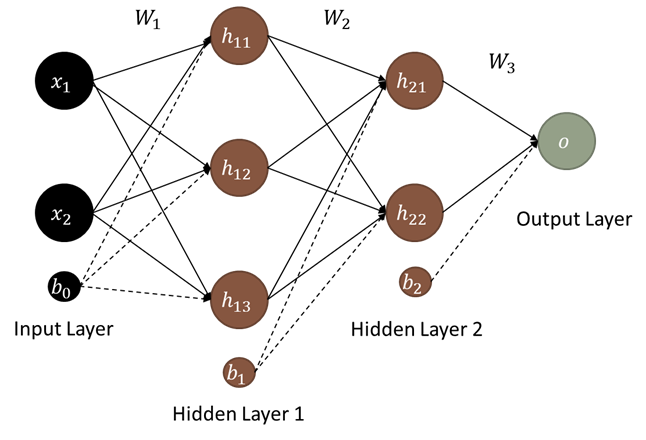

In [ ]:
from keras import layers
import keras

def build_nn_model(input_shape):
  # create model
  model = keras.Sequential()

  # 2 LSTM layers
  model.add(layers.LSTM(64, input_shape=input_shape, return_sequences=True))
  model.add(layers.LSTM(64))
  
  # dense layer
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.3))

  # output layer
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [ ]:
import numpy as np
from random import random

# save the activations and derivatives for gd
# implement backpropagation
# implement gradient descent
# implement a train method
# train our net with some dummy dataset
# make some predictions

class MLP:
  # Constructor
  def __init__(self, num_inputs = 3, num_hidden = [3, 3], num_outputs = 2):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs

    layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

    # Initialize random weights
    weights = []
    for i in range(len(layers) - 1):
      w = np.random.rand(layers[i], layers[i + 1])
      weights.append(w)
    self.weights = weights

    activations = []
    for i in range(len(layers)):
      a = np.zeros(layers[i])
      activations.append(a)
    self.activations = activations
  
    derivatives = []
    for i in range(len(layers)-1):
      d = np.zeros((layers[i], layers[i + 1]))
      derivatives.append(d)
    self.derivatives = derivatives

  def forward_propagate(self, inputs):
    activations = inputs

    self.activations[0] = inputs

    for i, w in enumerate(self.weights):
      # calculate net inputs
      net_inputs = np.dot(activations, w)

      # calculate activations
      activations = self._sigmoid(net_inputs)
      self.activations[i + 1] = activations

    return activations

  def back_propagate(self, error, verbose = False):
    # dE/dW_i = (y - a_[i+1]) s'(h_[i+1]) a_i
    # s'(h_[i+1]) = s(h_[i+1])(1 - s(h_[i+1]))
    # s(h_[i+1]) = a_[i+1]

    # dE/dW_[i-1] = (y - a_[i+1]) s'(h_[i+1]) W_i s'(h_i) a_[i-1]

    for i in reversed(range(len(self.derivatives))):
      activations = self.activations[i+1]
      delta = error * self._sigmoid_derivative(activations) # ndarray([0.1, 0.2]) --> ndarray([[0.1, 0.2]])
      delta_reshaped = delta.reshape(delta.shape[0], -1).T
      current_activations = self.activations[i] # ndarray([0.1, 0.2]) --> ndarray([[0.1], [0.2]])
      
      current_activations = current_activations.reshape(current_activations.shape[0], -1)
      
      self.derivatives[i] = np.dot(current_activations, delta_reshaped)
      error = np.dot(delta, self.weights[i].T)

      if verbose:
        print(f"Derivatives for W{i}: {self.derivatives[i]}")      

    return error

  def gradient_descent(self, learning_rate):
    for i in range(len(self.weights)):
      weights = self.weights[i]
      #print(f"Original W{i} {weights} ")

      derivatives = self.derivatives[i]

      weights +=  derivatives * learning_rate
      #print(f"Updated W{i} {weights} ")
  
  def train(self, inputs, targets, epochs, learning_rate):
    for i in range(epochs):
      sum_error = 0
      for input, target  in zip(inputs, targets):
        
        # Perform forward Propagation
        output = self.forward_propagate(input)
        # calculate the error
        error = target - output
        # backward propagation
        self.back_propagate(error)##, verbose = True)
        # Apply grdient descent 
        self.gradient_descent(learning_rate)

        sum_error += self._mse(target, output)
      # report the error for each epoch
      print(f"Error: {sum_error / len(inputs)} at epoch {i}")

    

  def _mse(self, target, output):
    return np.average((target- output) ** 2)

  def _sigmoid_derivative(self, x):
    return x * (1.0 - x)

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

if __name__ == "__main__":
  # Create dummy inputs --> arry([[0.1, 0.2], [0.3, 0.4]])
  inputs = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
  
  targets = np.array([[i[0] + i[1]] for i in inputs]) # array([[0.3], [0.7]])

  # Create MLP
  mlp = MLP(2, [5], 1)
  
  print(inputs)
  print(inputs.shape)
  # train our mlp
  mlp.train(inputs, targets, 50, 0.1)

  # Create dummy data
  input = np.array([0.3, 0.1])
  target = np.array([0.4])
  output = mlp.forward_propagate(input)
  print(f"\n\n Our network believes that {input[0]} + {input[1]} is equal to {output[0]}")


In [ ]:
# read the data, build the NN, compile, train and test 
if __name__ == "__main__":
  # load data
  inputs, targets = load_data(DATASET_PATH)

  # split the data into train and test sets
  inputs_train, inputs_test, targets_train, targets_test = train_test_split(
      inputs, targets, test_size=0.3
  )
  # build the network architecture
  model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    #  1st hidden layer
    keras.layers.Dense(512, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #  2nd hidden layer
    keras.layers.Dense(256, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #  3rd hidden layer
    keras.layers.Dense(64, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation = "softmax")
  ])

  # compile network
  optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
  model.compile (optimizer = optimizer,
                 loss = "sparse_categorical_crossentropy",
                 metrics = "accuracy")
  model.summary()

  # train network
  history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
            epochs = 50, batch_size = 32)
  # plot accuracy and error over the epochs
  plot_history(history)